In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
carcrash = pd.read_csv('carcrash.csv')

In [4]:
carcrash

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,10-24,64.757,alive,airbag,none,0,m,37,2001,1999.0,nodeploy,driver,0,6:71:2
8648,1-9km/h,178.651,alive,airbag,none,1,f,16,2001,2001.0,deploy,pass,1,76:57:2
8649,25-39,482.272,alive,airbag,belted,1,m,16,1997,1992.0,deploy,driver,1,74:65:1
8650,55+,32.467,alive,none,belted,1,m,26,1998,1994.0,unavail,driver,0,12:4:2


In [6]:
# INCLUINDO UMA COLUNA DE CATEGORIZAÇÃO DE IDADE
import sys

carcrash['ageGroup']=pd.cut(
   carcrash['ageOFocc'],
   bins=[0, 25, 40, 60, sys.maxsize],
   labels=['até 24', '25 à 39', '40 à 59', '60+'])

In [8]:
carcrash

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,ageGroup
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1,até 24
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2,25 à 39
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2,25 à 39
3,10-24,1567.626,alive,airbag,belted,0,f,24,2002,1994.0,nodeploy,driver,0,11:47:1,até 24
4,25-39,31.342,alive,none,none,1,f,46,1997,1990.0,unavail,pass,0,12:87:2,40 à 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,10-24,64.757,alive,airbag,none,0,m,37,2001,1999.0,nodeploy,driver,0,6:71:2,25 à 39
8648,1-9km/h,178.651,alive,airbag,none,1,f,16,2001,2001.0,deploy,pass,1,76:57:2,até 24
8649,25-39,482.272,alive,airbag,belted,1,m,16,1997,1992.0,deploy,driver,1,74:65:1,até 24
8650,55+,32.467,alive,none,belted,1,m,26,1998,1994.0,unavail,driver,0,12:4:2,25 à 39


In [9]:
#visualizando apenas itens numéricos
carcrash.select_dtypes(include='number').head() 

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy
0,18.895,0,25,2002,2000.0,1
1,266.532,1,28,2001,1991.0,0
2,51.810,1,36,1999,1994.0,1
3,1567.626,0,24,2002,1994.0,0
4,31.342,1,46,1997,1990.0,0


In [12]:
#CONTAGEM DE DADOS - APENAS ANO DO VEÍCULO TEM UM DADO EM BRANCO
carcrash.count()

dvcat       8652
weight      8652
dead        8652
airbag      8652
seatbelt    8652
frontal     8652
sex         8652
ageOFocc    8652
yearacc     8652
yearVeh     8651
abcat       8652
occRole     8652
deploy      8652
caseid      8652
ageGroup    8652
dtype: int64

In [21]:
## HIPÓTESES

# Mulher se envolve em menos acidentes
carcrash['sex'].value_counts()

# Cinto reduz acidentes fatais

# Pessoas mais novas são mais imprudentes

# Altas velocidades causam mais acidentes

m    4632
f    4020
Name: sex, dtype: int64

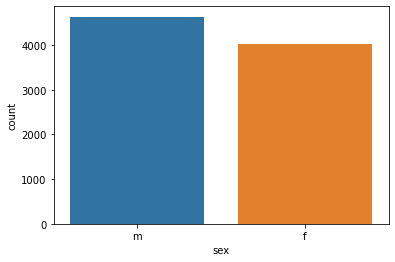

In [24]:
#Envolvimento de Homens x Mulheres em acidentes
sns.countplot(data = carcrash, x='sex')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

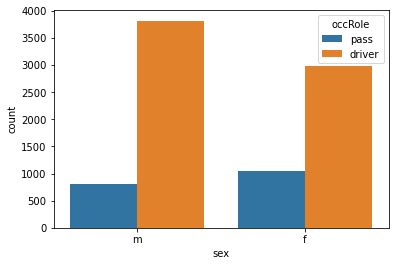

In [18]:
## Envolvimento de Mulheres x Homens em acidentes - Como motoristas

sns.countplot(x="sex", hue="occRole", data=carcrash)

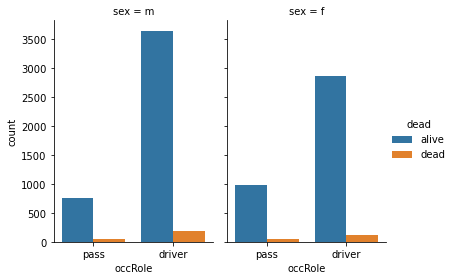

In [26]:
## Envolvimento de Mulheres x Homens em acidentes x mortes x motorista ou não

sns.catplot(x="occRole", hue="dead", col="sex",
                data=carcrash, kind="count",
                height=4, aspect=.7);

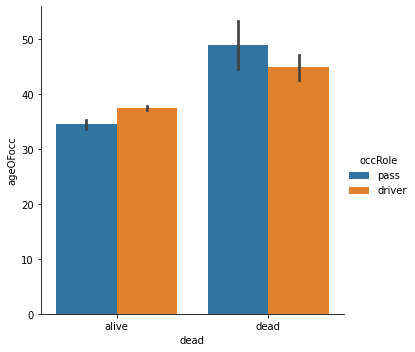

In [14]:
# idade dos acidentados x taxa de mortalidade x motorista ou não

sns.catplot(x="dead", y='ageOFocc', hue="occRole", kind="bar", data=carcrash)

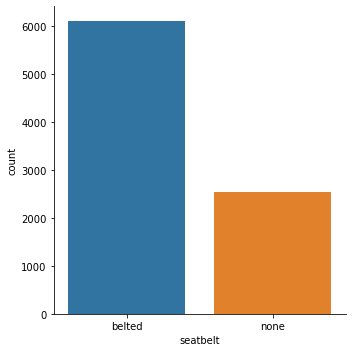

In [25]:
# contagem de pessoas de cinto
sns.catplot(x="seatbelt", kind="count", data=carcrash)

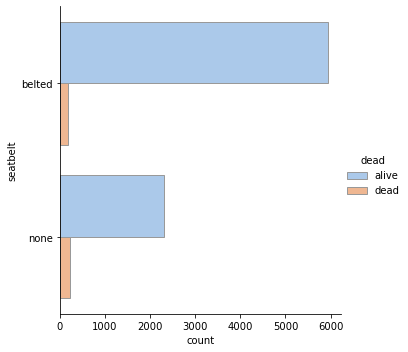

In [16]:
## CINTO REDUZ A CHANCE DE ACIDENTES FATAIS = comprovado

sns.catplot(y="seatbelt", hue="dead", kind="count",
            palette="pastel", edgecolor=".6",
            data=carcrash)

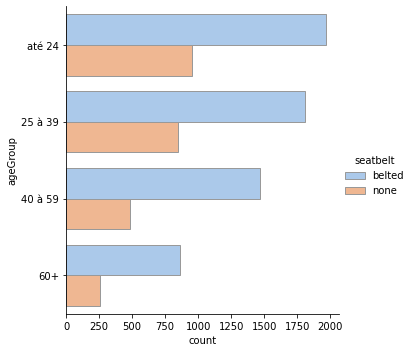

In [20]:
## Jovens são mais imprudentes = quanto ao cinto de segurança essa afirmativa é verdadeira

sns.catplot(y="ageGroup", hue="seatbelt", kind="count",
            palette="pastel", edgecolor=".6",
            data=carcrash)

In [22]:
carcrash['yearacc'].value_counts()

2002    1574
1999    1503
1998    1464
2000    1453
2001    1340
1997    1318
Name: yearacc, dtype: int64

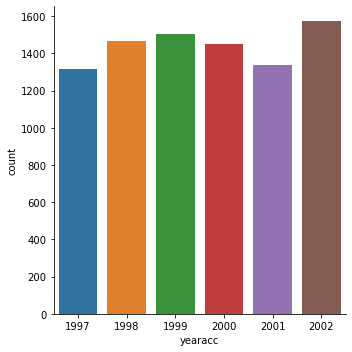

In [23]:
## ACIDENTES POR ANO

sns.catplot(x="yearacc", kind="count", data=carcrash)